# Projeto: Empresa Fictícia e Banco de Dados

## Descrição do Projeto

Neste projeto, você deverá realizar as seguintes tarefas:

### Escolha da Empresa Fictícia
- Selecione uma empresa fictícia e defina suas operações principais.

### Modelagem de Dados
- Liste todas as entidades relacionadas à empresa fictícia.
- Defina os atributos de cada entidade.
- Descreva os relacionamentos entre as entidades e suas respectivas cardinalidades.
- Elabore um Diagrama Entidade-Relacionamento (DER) utilizando qualquer ferramenta de desenho de sua escolha.

### Implementação do Banco de Dados
- Crie uma instância na Google Cloud Platform (GCP) para hospedar o banco de dados.
- Crie o banco de dados na instância da GCP e popule-o com dados relevantes.

### Conexão e Extração de Dados
- Crie um notebook no Google Colab para se conectar ao banco de dados criado na GCP.
- Extraia todas as tabelas e seus registros do banco de dados.
- Envie os dados extraídos para o BigQuery.

### Entrega
- Forneça o desenho do Diagrama Entidade-Relacionamento (DER).
- Compartilhe o link público do notebook do Google Colab utilizado para o processo de ETL (Extração, Transformação e Carga).





#  Empresa fictícia  Construcode.


Construcode é uma empresa fictícia de material de construção que se destaca pela inovação e qualidade em produtos para construção e reforma

## Entidades e Atributos
- 1. Clientes:
    - id_cliente: Identificador único para cada cliente.
    - nome: Nome do cliente.
    - tel: Número de telefone do cliente.
    - email: Endereço de e-mail do cliente.
    - genero: Gênero do cliente.
    - cidade: Cidade onde o cliente reside.
- 2. Produtos:
    - id_produto: Identificador único para cada produto.
    - nome: Nome do produto.
    - preço: Preço do produto.
    - id_categoria: Identificador da categoria do produto (relacionamento com Categorias).
    - id_inventario: Identificador do inventário do produto (relacionamento com Inventário).
- 3. Vendas:
    - id_venda: Identificador único para cada venda.
    - total: Valor total da venda.
    - data_venda: Data da venda.
    - id_cliente: Identificador do cliente que fez a compra (relacionamento com Clientes).
    - id_funcionario: Identificador do funcionário que realizou a venda (relacionamento com Funcionários).
    - id_produto : Identificador do produto vendido (relacionamento com
    Produtos ).
- 4. Funcionários:
    - id_funcionario: Identificador único para cada funcionário.
    - nome: Nome do funcionário.
    - cargo: Cargo do funcionário.
    - salario: Salário do funcionário.
    - endereco: Endereço do funcionário.
    - genero: Gênero do funcionário.
- 5. Categorias:
    - id_categoria: Identificador único para cada categoria.
    - nome: Nome da categoria.
- 6. Devoluções:
    - id_devolucao: Identificador único para cada devolução.
    - id_produto: Identificador do produto devolvido (relacionamento com Produtos).
    - id_venda: Identificador da venda da qual o produto foi devolvido (relacionamento com Vendas).
    - motivo: Motivo da devolução.
    - data_devolucao: Data da devolução.
- 7. Inventário:
    - id_inventario: Identificador único para o inventário do produto.
    - quantidade: Quantidade disponível no inventário.
    - localizacao: Localização física do produto no estoque.

# Diagrama Entidade-Relacionamento (DER)

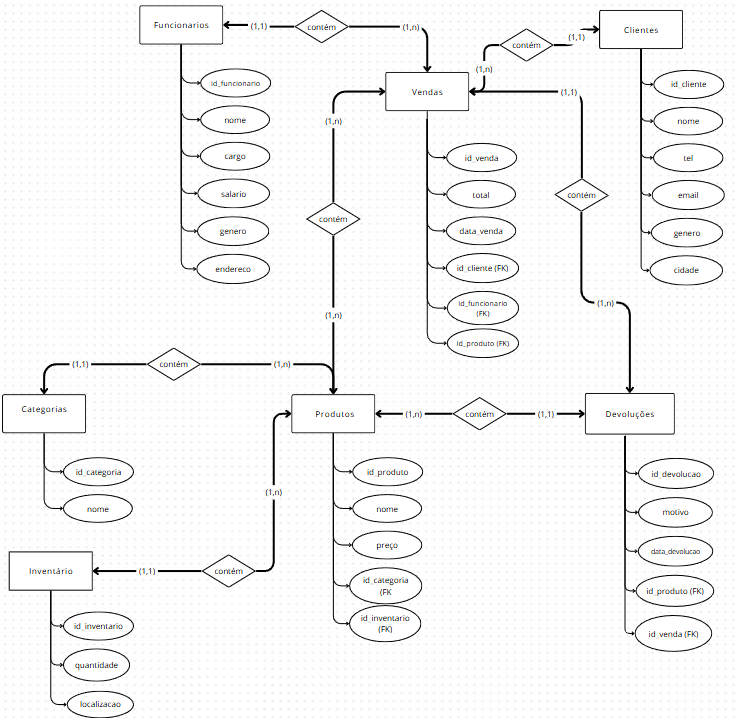

# Criação do DataBase

In [ ]:
'''
  CREATE DATABASE construcode;
'''

## Criação das tabelas

In [ ]:
'''
CREATE TABLE clientes(
  id_cliente INT PRIMARY KEY,
  nome VARCHAR (50),
  tel VARCHAR (50),
  email VARCHAR (50),
  genero VARCHAR (50),
  cidade VARCHAR (50)
);


CREATE TABLE categorias(
  id_categoria INT PRIMARY KEY,
  nome VARCHAR (50)
);

CREATE TABLE inventario(
  id_inventario INT PRIMARY KEY,
  quantidade INT,
  localizacao VARCHAR (50)
);

CREATE TABLE produtos(
  id_produto INT PRIMARY KEY ,
  nome VARCHAR (50),
  preço FLOAT,
  id_categoria INT,
  id_inventario INT,
  FOREIGN KEY (id_categoria) REFERENCES categorias(id_categoria),
  FOREIGN KEY (id_inventario) REFERENCES inventario(id_inventario)
);
CREATE TABLE funcionarios(
  id_funcionario INT PRIMARY KEY,
  nome VARCHAR (50),
  cargo VARCHAR (50),
  salario FLOAT,
  endereco VARCHAR (50),
  genero VARCHAR (50)
);


CREATE TABLE vendas(
  id_venda INT PRIMARY KEY,
  total FLOAT,
  data_venda DATE,
  id_cliente INT,
  id_funcionario INT,
  id_produto INT,
  FOREIGN KEY (id_cliente) REFERENCES clientes(id_cliente),
  FOREIGN KEY (id_funcionario) REFERENCES funcionarios(id_funcionario),
  FOREIGN KEY (id_produto) REFERENCES produtos(id_produto)
);


CREATE TABLE devolucoes(
  id_devolucao INT PRIMARY KEY,
  motivo VARCHAR (50),
  data_devolucao DATE,
  id_produto INT,
  id_venda INT,
  FOREIGN KEY (id_produto) REFERENCES produtos(id_produto),
  FOREIGN KEY (id_venda) REFERENCES vendas(id_venda)
);

'''

## Populando as Tabelas

In [ ]:
#Clientes
'''
INSERT INTO clientes (id_cliente, nome, tel, email, genero, cidade) VALUES
(1, 'Ana Silva', '1234-5678', 'ana.silva@example.com', 'Feminino', 'São Paulo'),
(2, 'Carlos Pereira', '2345-6789', 'carlos.pereira@example.com', 'Masculino', 'Rio de Janeiro'),
(3, 'Fernanda Costa', '3456-7890', 'fernanda.costa@example.com', 'Feminino', 'Belo Horizonte'),
(4, 'João Santos', '4567-8901', 'joao.santos@example.com', 'Masculino', 'Porto Alegre'),
(5, 'Mariana Lima', '5678-9012', 'mariana.lima@example.com', 'Feminino', 'Curitiba'),
(6, 'Lucas Oliveira', '6789-0123', 'lucas.oliveira@example.com', 'Masculino', 'Salvador'),
(7, 'Juliana Almeida', '7890-1234', 'juliana.almeida@example.com', 'Feminino', 'Recife'),
(8, 'Pedro Souza', '8901-2345', 'pedro.souza@example.com', 'Masculino', 'Fortaleza'),
(9, 'Tatiane Rocha', '9012-3456', 'tatiane.rocha@example.com', 'Feminino', 'Manaus'),
(10, 'Rodrigo Martins', '0123-4567', 'rodrigo.martins@example.com', 'Masculino', 'Belém'),
(11, 'Camila Ferreira', '1234-5679', 'camila.ferreira@example.com', 'Feminino', 'São Luís'),
(12, 'Gabriel Mendes', '2345-6780', 'gabriel.mendes@example.com', 'Masculino', 'Vitória'),
(13, 'Isabela Oliveira', '3456-7891', 'isabela.oliveira@example.com', 'Feminino', 'João Pessoa'),
(14, 'Bruno Rodrigues', '4567-8902', 'bruno.rodrigues@example.com', 'Masculino', 'Maceió'),
(15, 'Larissa Costa', '5678-9013', 'larissa.costa@example.com', 'Feminino', 'Aracaju'),
(16, 'Diego Almeida', '6789-0124', 'diego.almeida@example.com', 'Masculino', 'Campo Grande'),
(17, 'Sofia Lima', '7890-1235', 'sofia.lima@example.com', 'Feminino', 'Cuiabá'),
(18, 'Felipe Pereira', '8901-2346', 'felipe.pereira@example.com', 'Masculino', 'Teresina'),
(19, 'Amanda Silva', '9012-3457', 'amanda.silva@example.com', 'Feminino', 'São Bernardo do Campo'),
(20, 'Ricardo Santos', '0123-4568', 'ricardo.santos@example.com', 'Masculino', 'Santo André'),
(21, 'Camila Costa', '1234-5670', 'camila.costa@example.com', 'Feminino', 'Niterói'),
(22, 'João Silva', '2345-6781', 'joao.silva@example.com', 'Masculino', 'São José dos Campos'),
(23, 'Tatiane Almeida', '3456-7892', 'tatiane.almeida@example.com', 'Feminino', 'Guarulhos'),
(24, 'André Lima', '4567-8903', 'andre.lima@example.com', 'Masculino', 'Campinas'),
(25, 'Larissa Oliveira', '5678-9014', 'larissa.oliveira@example.com', 'Feminino', 'São João de Meriti'),
(26, 'Marcos Ferreira', '6789-0125', 'marcos.ferreira@example.com', 'Masculino', 'Diadema'),
(27, 'Juliana Souza', '7890-1236', 'juliana.souza@example.com', 'Feminino', 'São Vicente'),
(28, 'Pedro Costa', '8901-2347', 'pedro.costa@example.com', 'Masculino', 'Mauá'),
(29, 'Ana Lima', '9012-3458', 'ana.lima@example.com', 'Feminino', 'Osasco'),
(30, 'Carlos Santos', '0123-4569', 'carlos.santos@example.com', 'Masculino', 'Santos'),
(31, 'Fernanda Oliveira', '1234-5671', 'fernanda.oliveira@example.com', 'Feminino', 'São José'),
(32, 'João Pereira', '2345-6782', 'joao.pereira@example.com', 'Masculino', 'Jaboatão dos Guararapes'),
(33, 'Mariana Ferreira', '3456-7893', 'mariana.ferreira@example.com', 'Feminino', 'Caruaru'),
(34, 'Lucas Costa', '4567-8904', 'lucas.costa@example.com', 'Masculino', 'Garanhuns'),
(35, 'Juliana Lima', '5678-9015', 'juliana.lima@example.com', 'Feminino', 'Limoeiro'),
(36, 'Pedro Oliveira', '6789-0126', 'pedro.oliveira@example.com', 'Masculino', 'Petrolina'),
(37, 'Tatiane Silva', '7890-1237', 'tatiane.silva@example.com', 'Feminino', 'Juazeiro'),
(38, 'Rodrigo Costa', '8901-2348', 'rodrigo.costa@example.com', 'Masculino', 'Paulo Afonso'),
(39, 'Camila Souza', '9012-3459', 'camila.souza@example.com', 'Feminino', 'Serra Talhada'),
(40, 'Gabriel Almeida', '0123-4570', 'gabriel.almeida@example.com', 'Masculino', 'Arcoverde'),
(41, 'Sofia Ferreira', '1234-5672', 'sofia.ferreira@example.com', 'Feminino', 'Afogados da Ingazeira'),
(42, 'Felipe Santos', '2345-6783', 'felipe.santos@example.com', 'Masculino', 'Santa Cruz do Capibaribe'),
(43, 'Amanda Costa', '3456-7894', 'amanda.costa@example.com', 'Feminino', 'Igarassu'),
(44, 'Ricardo Oliveira', '4567-8905', 'ricardo.oliveira@example.com', 'Masculino', 'São Bento do Sul'),
(45, 'Camila Pereira', '5678-9016', 'camila.pereira@example.com', 'Feminino', 'Joinville'),
(46, 'João Santos', '6789-0127', 'joao.santos@example.com', 'Masculino', 'Blumenau'),
(47, 'Tatiane Costa', '7890-1238', 'tatiane.costa@example.com', 'Feminino', 'Itajaí'),
(48, 'André Ferreira', '8901-2349', 'andre.ferreira@example.com', 'Masculino', 'Criciúma'),
(49, 'Larissa Almeida', '9012-3460', 'larissa.almeida@example.com', 'Feminino', 'Chapecó'),
(50, 'Marcos Silva', '0123-4571', 'marcos.silva@example.com', 'Masculino', 'Palhoça'),
(51, 'Juliana Costa', '1234-5673', 'juliana.costa@example.com', 'Feminino', 'São José'),
(52, 'Pedro Lima', '2345-6784', 'pedro.lima@example.com', 'Masculino', 'Itapema'),
(53, 'Ana Oliveira', '3456-7895', 'ana.oliveira@example.com', 'Feminino', 'Governador Celso Ramos'),
(54, 'Carlos Ferreira', '4567-8906', 'carlos.ferreira@example.com', 'Masculino', 'Tubarão'),
(55, 'Fernanda Santos', '5678-9017', 'fernanda.santos@example.com', 'Feminino', 'Araranguá'),
(56, 'João Almeida', '6789-0128', 'joao.almeida@example.com', 'Masculino', 'São Francisco do Sul'),
(57, 'Mariana Souza', '7890-1239', 'mariana.souza@example.com', 'Feminino', 'Serra'),
(58, 'Lucas Lima', '8901-2350', 'lucas.lima@example.com', 'Masculino', 'Vila Velha'),
(59, 'Juliana Oliveira', '9012-3461', 'juliana.oliveira@example.com', 'Feminino', 'Cariacica'),
(60, 'Pedro Pereira', '0123-4572', 'pedro.pereira@example.com', 'Masculino', 'Guarapari'),
(61, 'Tatiane Almeida', '1234-5674', 'tatiane.almeida@example.com', 'Feminino', 'São Mateus'),
(62, 'Ricardo Costa', '2345-6785', 'ricardo.costa@example.com', 'Masculino', 'Linhares'),
(63, 'Amanda Silva', '3456-7896', 'amanda.silva@example.com', 'Feminino', 'Colatina'),
(64, 'Felipe Ferreira', '4567-8907', 'felipe.ferreira@example.com', 'Masculino', 'São João Nepomuceno'),
(65, 'Camila Costa', '5678-9018', 'camila.costa@example.com', 'Feminino', 'Viana'),
(66, 'Gabriel Lima', '6789-0129', 'gabriel.lima@example.com', 'Masculino', 'São José do Calçado'),
(67, 'Sofia Oliveira', '7890-1240', 'sofia.oliveira@example.com', 'Feminino', 'Nova Venécia'),
(68, 'André Santos', '8901-2351', 'andre.santos@example.com', 'Masculino', 'Afonso Cláudio'),
(69, 'Larissa Almeida', '9012-3462', 'larissa.almeida@example.com', 'Feminino', 'Pedro Canário'),
(70, 'Marcos Costa', '0123-4573', 'marcos.costa@example.com', 'Masculino', 'Domingos Martins'),
(71, 'Juliana Pereira', '1234-5675', 'juliana.pereira@example.com', 'Feminino', 'Serra'),
(72, 'Pedro Silva', '2345-6786', 'pedro.silva@example.com', 'Masculino', 'São Francisco de Itabapoana'),
(73, 'Ana Costa', '3456-7897', 'ana.costa@example.com', 'Feminino', 'Vila Velha'),
(74, 'Carlos Almeida', '4567-8908', 'carlos.almeida@example.com', 'Masculino', 'Guarapari'),
(75, 'Fernanda Lima', '5678-9019', 'fernanda.lima@example.com', 'Feminino', 'Cachoeiro de Itapemirim'),
(76, 'João Ferreira', '6789-0130', 'joao.ferreira@example.com', 'Masculino', 'Linhares'),
(77, 'Mariana Almeida', '7890-1241', 'mariana.almeida@example.com', 'Feminino', 'São João Nepomuceno'),
(78, 'Lucas Silva', '8901-2352', 'lucas.silva@example.com', 'Masculino', 'São José do Calçado'),
(79, 'Juliana Ferreira', '9012-3463', 'juliana.ferreira@example.com', 'Feminino', 'Viana'),
(80, 'Pedro Costa', '0123-4574', 'pedro.costa@example.com', 'Masculino', 'São Francisco de Itabapoana'),
(81, 'Tatiane Oliveira', '1234-5676', 'tatiane.oliveira@example.com', 'Feminino', 'Nova Venécia'),
(82, 'Ricardo Lima', '2345-6787', 'ricardo.lima@example.com', 'Masculino', 'Afonso Cláudio'),
(83, 'Amanda Almeida', '3456-7898', 'amanda.almeida@example.com', 'Feminino', 'Pedro Canário'),
(84, 'Felipe Santos', '4567-8909', 'felipe.santos@example.com', 'Masculino', 'Domingos Martins'),
(85, 'Camila Ferreira', '5678-9020', 'camila.ferreira@example.com', 'Feminino', 'São Francisco de Itabapoana'),
(86, 'Gabriel Almeida', '6789-0131', 'gabriel.almeida@example.com', 'Masculino', 'Viana'),
(87, 'Sofia Costa', '7890-1242', 'sofia.costa@example.com', 'Feminino', 'Nova Venécia'),
(88, 'André Lima', '8901-2353', 'andre.lima@example.com', 'Masculino', 'São João Nepomuceno'),
(89, 'Larissa Silva', '9012-3464', 'larissa.silva@example.com', 'Feminino', 'São José do Calçado'),
(90, 'Marcos Oliveira', '0123-4575', 'marcos.oliveira@example.com', 'Masculino', 'Afonso Cláudio'),
(91, 'Juliana Costa', '1234-5677', 'juliana.costa@example.com', 'Feminino', 'Pedro Canário'),
(92, 'Pedro Almeida', '2345-6788', 'pedro.almeida@example.com', 'Masculino', 'Domingos Martins'),
(93, 'Ana Pereira', '3456-7899', 'ana.pereira@example.com', 'Feminino', 'São Francisco de Itabapoana'),
(94, 'Carlos Costa', '4567-8910', 'carlos.costa@example.com', 'Masculino', 'Viana'),
(95, 'Fernanda Almeida', '5678-9021', 'fernanda.almeida@example.com', 'Feminino', 'Nova Venécia'),
(96, 'João Silva', '6789-0132', 'joao.silva@example.com', 'Masculino', 'São João Nepomuceno'),
(97, 'Mariana Costa', '7890-1243', 'mariana.costa@example.com', 'Feminino', 'São José do Calçado'),
(98, 'Lucas Ferreira', '8901-2354', 'lucas.ferreira@example.com', 'Masculino', 'Afonso Cláudio'),
(99, 'Juliana Santos', '9012-3465', 'juliana.santos@example.com', 'Feminino', 'Pedro Canário'),
(100, 'Pedro Almeida', '0123-4576', 'pedro.almeida@example.com', 'Masculino', 'Domingos Martins');
'''

In [ ]:
# Categorias
'''
INSERT INTO categorias (id_categoria, nome) VALUES
(1, 'Cimento'),
(2, 'Areia'),
(3, 'Brita'),
(4, 'Tijolos'),
(5, 'Revestimentos'),
(6, 'Tintas'),
(7, 'Ferragens'),
(8, 'Madeiras'),
(9, 'Tubos e Conexões'),
(10, 'Elétrica'),
(11, 'Hidráulica'),
(12, 'Impermeabilizantes'),
(13, 'Ferramentas'),
(14, 'Materiais para Drywall'),
(15, 'Portas e Janelas'),
(16, 'Telhas'),
(17, 'Acessórios para Construção'),
(18, 'Móveis para Construção'),
(19, 'Sistema de Aquecimento'),
(20, 'Sistema de Ar Condicionado'),
(21, 'Rejuntes e Colas'),
(22, 'Acessórios Elétricos'),
(23, 'Acessórios Hidráulicos'),
(24, 'Materiais de Segurança'),
(25, 'Equipamentos de Proteção Individual (EPI)'),
(26, 'Sinalização e Segurança'),
(27, 'Sistemas de Ventilação'),
(28, 'Pisos e Azulejos'),
(29, 'Material para Impermeabilização'),
(30, 'Materiais para Jardinagem');
'''

In [ ]:
# Inventário
'''
INSERT INTO inventario (id_inventario, quantidade, localizacao) VALUES
(1, 150, 'Prateleira A1'),
(2, 80, 'Prateleira A2'),
(3, 200, 'Prateleira B1'),
(4, 50, 'Prateleira B2'),
(5, 120, 'Prateleira C1'),
(6, 75, 'Prateleira C2'),
(7, 30, 'Prateleira D1'),
(8, 90, 'Prateleira D2'),
(9, 60, 'Prateleira E1'),
(10, 100, 'Prateleira E2'),
(11, 40, 'Prateleira F1'),
(12, 110, 'Prateleira F2'),
(13, 55, 'Prateleira G1'),
(14, 85, 'Prateleira G2'),
(15, 95, 'Prateleira H1'),
(16, 25, 'Prateleira H2'),
(17, 140, 'Prateleira I1'),
(18, 70, 'Prateleira I2'),
(19, 105, 'Prateleira J1'),
(20, 50, 'Prateleira J2'),
(21, 65, 'Prateleira K1'),
(22, 115, 'Prateleira K2'),
(23, 90, 'Prateleira L1'),
(24, 35, 'Prateleira L2'),
(25, 80, 'Prateleira M1'),
(26, 120, 'Prateleira M2'),
(27, 70, 'Prateleira N1'),
(28, 55, 'Prateleira N2'),
(29, 95, 'Prateleira O1'),
(30, 85, 'Prateleira O2'),
(31, 100, 'Prateleira P1'),
(32, 45, 'Prateleira P2'),
(33, 60, 'Prateleira Q1'),
(34, 130, 'Prateleira Q2'),
(35, 75, 'Prateleira R1'),
(36, 110, 'Prateleira R2'),
(37, 50, 'Prateleira S1'),
(38, 85, 'Prateleira S2'),
(39, 95, 'Prateleira T1'),
(40, 65, 'Prateleira T2'),
(41, 150, 'Prateleira U1'),
(42, 80, 'Prateleira U2'),
(43, 100, 'Prateleira V1'),
(44, 55, 'Prateleira V2'),
(45, 110, 'Prateleira W1'),
(46, 45, 'Prateleira W2'),
(47, 70, 'Prateleira X1'),
(48, 95, 'Prateleira X2'),
(49, 120, 'Prateleira Y1'),
(50, 85, 'Prateleira Y2'),
(51, 55, 'Prateleira Z1'),
(52, 60, 'Prateleira Z2'),
(53, 75, 'Prateleira AA1'),
(54, 105, 'Prateleira AA2'),
(55, 50, 'Prateleira BB1'),
(56, 90, 'Prateleira BB2'),
(57, 80, 'Prateleira CC1'),
(58, 120, 'Prateleira CC2'),
(59, 70, 'Prateleira DD1'),
(60, 85, 'Prateleira DD2'),
(61, 40, 'Prateleira EE1'),
(62, 95, 'Prateleira EE2'),
(63, 100, 'Prateleira FF1'),
(64, 60, 'Prateleira FF2'),
(65, 85, 'Prateleira GG1'),
(66, 130, 'Prateleira GG2'),
(67, 55, 'Prateleira HH1'),
(68, 70, 'Prateleira HH2'),
(69, 95, 'Prateleira II1'),
(70, 120, 'Prateleira II2'),
(71, 75, 'Prateleira JJ1'),
(72, 110, 'Prateleira JJ2'),
(73, 50, 'Prateleira KK1'),
(74, 85, 'Prateleira KK2'),
(75, 65, 'Prateleira LL1'),
(76, 100, 'Prateleira LL2'),
(77, 80, 'Prateleira MM1'),
(78, 90, 'Prateleira MM2'),
(79, 120, 'Prateleira NN1'),
(80, 55, 'Prateleira NN2'),
(81, 65, 'Prateleira OO1'),
(82, 105, 'Prateleira OO2'),
(83, 85, 'Prateleira PP1'),
(84, 70, 'Prateleira PP2'),
(85, 90, 'Prateleira QQ1'),
(86, 60, 'Prateleira QQ2'),
(87, 110, 'Prateleira RR1'),
(88, 75, 'Prateleira RR2'),
(89, 100, 'Prateleira SS1'),
(90, 80, 'Prateleira SS2'),
(91, 95, 'Prateleira TT1'),
(92, 85, 'Prateleira TT2'),
(93, 65, 'Prateleira UU1'),
(94, 120, 'Prateleira UU2'),
(95, 70, 'Prateleira VV1'),
(96, 55, 'Prateleira VV2'),
(97, 85, 'Prateleira WW1'),
(98, 100, 'Prateleira WW2'),
(99, 90, 'Prateleira XX1'),
(100, 75, 'Prateleira XX2');
'''

In [ ]:
# Produtos
'''
INSERT INTO produtos (id_produto, nome, preço, id_categoria, id_inventario) VALUES
(1, 'Cimento Portland', 25.50, 1, 1),
(2, 'Areia Grossa', 15.75, 2, 2),
(3, 'Brita 1', 18.90, 3, 3),
(4, 'Tijolo Cerâmico', 0.90, 4, 4),
(5, 'Revestimento Cerâmico', 40.00, 5, 5),
(6, 'Tintas Acrílicas', 120.00, 6, 6),
(7, 'Parafuso Aço', 5.50, 7, 7),
(8, 'Madeira de Pinus', 85.00, 8, 8),
(9, 'Tubo PVC 50mm', 8.20, 9, 9),
(10, 'Interruptor Simples', 10.00, 10, 10),
(11, 'Misturador Monocomando', 250.00, 11, 11),
(12, 'Impermeabilizante Líquido', 95.00, 12, 12),
(13, 'Martelo', 30.00, 13, 13),
(14, 'Placa Drywall', 45.00, 14, 14),
(15, 'Porta de Madeira', 220.00, 15, 15),
(16, 'Telha Cerâmica', 1.50, 16, 16),
(17, 'Fita Isolante', 6.00, 17, 17),
(18, 'Luminária LED', 90.00, 18, 18),
(19, 'Calha de Alumínio', 30.00, 19, 19),
(20, 'Ar Condicionado Split', 1500.00, 20, 20),
(21, 'Rejunte Branco', 10.00, 21, 21),
(22, 'Fusível 10A', 2.50, 22, 22),
(23, 'Conector para Mangueira', 7.00, 23, 23),
(24, 'Capacete de Segurança', 25.00, 24, 24),
(25, 'Luva de Proteção', 12.00, 25, 25),
(26, 'Sinalização de Segurança', 8.00, 26, 26),
(27, 'Ventilador de Teto', 200.00, 27, 27),
(28, 'Piso Vinílico', 60.00, 28, 28),
(29, 'Impermeabilizante para Telhado', 115.00, 29, 29),
(30, 'Regador de Jardim', 15.00, 30, 30),
(31, 'Adesivo de Cimentício', 22.00, 5, 31),
(32, 'Tinta Epóxi', 180.00, 6, 32),
(33, 'Parafuso de Rosca', 7.00, 7, 33),
(34, 'Madeira de Eucalipto', 90.00, 8, 34),
(35, 'Mangueira de Jardim', 25.00, 9, 35),
(36, 'Tomada 10A', 6.00, 10, 36),
(37, 'Chuveiro Elétrico', 70.00, 11, 37),
(38, 'Selante Acrílico', 12.00, 12, 38),
(39, 'Alicate de Corte', 35.00, 13, 39),
(40, 'Painel Drywall', 50.00, 14, 40),
(41, 'Junta de Expansão', 15.00, 17, 41),
(42, 'Tampa de Esgoto', 25.00, 23, 42),
(43, 'Porta de Alumínio', 300.00, 15, 43),
(44, 'Grelha de Ventilação', 18.00, 27, 44),
(45, 'Caixa de Ferramentas', 60.00, 13, 45),
(46, 'Cinta de Poliéster', 20.00, 17, 46),
(47, 'Tinta Base Água', 90.00, 6, 47),
(48, 'Baldosa Cerâmica', 1.20, 5, 48),
(49, 'Massa para Gesso', 35.00, 5, 49),
(50, 'Tubos de PVC 100mm', 12.00, 9, 50),
(51, 'Pintura em Spray', 25.00, 6, 51),
(52, 'Escada de Alumínio', 150.00, 13, 52),
(53, 'Fita de Medição', 15.00, 13, 53),
(54, 'Régua de Nível', 20.00, 13, 54),
(55, 'Ladrilho Hidráulico', 35.00, 5, 55),
(56, 'Pincel para Pintura', 7.00, 13, 56),
(57, 'Cola para Azulejos', 45.00, 5, 57),
(58, 'Reboco para Paredes', 30.00, 5, 58),
(59, 'Eletroduto', 8.00, 10, 59),
(60, 'Interruptor Duplo', 12.00, 10, 60),
(61, 'Arame Galvanizado', 22.00, 13, 61),
(62, 'Grampo para Telha', 10.00, 16, 62),
(63, 'Lâmpada LED', 15.00, 18, 63),
(64, 'Cabo Elétrico', 40.00, 10, 64),
(65, 'Broca para Concreto', 20.00, 13, 65),
(66, 'Pedra de Construção', 20.00, 3, 66),
(67, 'Calço de Madeira', 12.00, 8, 67),
(68, 'Isolante Térmico', 25.00, 17, 68),
(69, 'Fita Métrica', 20.00, 13, 69),
(70, 'Gesso Acartonado', 55.00, 14, 70),
(71, 'Tinta para Metal', 95.00, 6, 71),
(72, 'Tinta para Madeira', 110.00, 6, 72),
(73, 'Agregados para Construção', 15.00, 3, 73),
(74, 'Conector Elétrico', 4.00, 10, 74),
(75, 'Cinta de Aço', 18.00, 13, 75),
(76, 'Painel Solar', 800.00, 27, 76),
(77, 'Manta Impermeabilizante', 85.00, 29, 77),
(78, 'Telha de Fibrocimento', 1.30, 16, 78),
(79, 'Gesso para Reparo', 32.00, 5, 79),
(80, 'Fita Antiderrapante', 10.00, 17, 80),
(81, 'Porta de Alumínio', 320.00, 15, 81),
(82, 'Massa para Reboco', 30.00, 5, 82),
(83, 'Piso Laminado', 65.00, 28, 83),
(84, 'Cimento Resistente', 28.00, 1, 84),
(85, 'Argamassa Polimérica', 55.00, 5, 85),
(86, 'Ladrilho Hidráulico', 1.60, 5, 86),
(87, 'Conector de Mangueira', 6.00, 23, 87),
(88, 'Tinta para Parede Externa', 110.00, 6, 88),
(89, 'Espuma Expansiva', 45.00, 13, 89),
(90, 'Sistema de Irrigação', 150.00, 30, 90),
(91, 'Revestimento para Piso', 70.00, 28, 91),
(92, 'Manta para Telhado', 60.00, 29, 92),
(93, 'Massa para Gesso', 35.00, 5, 93),
(94, 'Porta de Vidro Temperado', 350.00, 15, 94),
(95, 'Escada Telescópica', 200.00, 13, 95),
(96, 'Régua de Nível Digital', 45.00, 13, 96),
(97, 'Espuma de Poliuretano', 25.00, 13, 97),
(98, 'Tinta para Mármore', 150.00, 6, 98),
(99, 'Cabo de Rede', 30.00, 10, 99),
(100, 'Selo de Concreto', 55.00, 1, 100);
'''

In [ ]:
#Funcionários
'''
INSERT INTO funcionarios (id_funcionario, nome, cargo, salario, endereco, genero) VALUES
(1, 'Ana Souza', 'Gerente de Vendas', 5000.00, 'Rua das Flores, 123', 'Feminino'),
(2, 'João Oliveira', 'Caixa', 2500.00, 'Avenida Central, 456', 'Masculino'),
(3, 'Mariana Silva', 'Auxiliar de Estoque', 2800.00, 'Rua da Praia, 789', 'Feminino'),
(4, 'Carlos Pereira', 'Vendedor', 3200.00, 'Rua do Comércio, 101', 'Masculino'),
(5, 'Julia Santos', 'Atendente', 2300.00, 'Rua dos Pinheiros, 202', 'Feminino'),
(6, 'Ricardo Lima', 'Supervisor de Loja', 4500.00, 'Avenida Brasil, 303', 'Masculino'),
(7, 'Fernanda Costa', 'Assistente Administrativo', 2700.00, 'Rua das Acácias, 404', 'Feminino'),
(8, 'Mateus Almeida', 'Repositor', 2400.00, 'Rua das Laranjeiras, 505', 'Masculino'),
(9, 'Isabela Martins', 'Gerente de Estoque', 4800.00, 'Avenida das Palmeiras, 606', 'Feminino'),
(10, 'Bruno Mendes', 'Segurança', 2200.00, 'Rua dos Jacarandás, 707', 'Masculino');
'''

In [ ]:
#Vendas
'''INSERT INTO vendas (id_venda, total, data_venda, id_cliente, id_funcionario, id_produto) VALUES
(1, 250.00, '2024-01-15', 1, 1, 1),
(2, 320.00, '2024-01-16', 2, 2, 2),
(3, 180.00, '2024-01-17', 3, 3, 3),
(4, 450.00, '2024-01-18', 4, 4, 4),
(5, 275.00, '2024-01-19', 5, 5, 5),
(6, 150.00, '2024-01-20', 6, 6, 6),
(7, 500.00, '2024-01-21', 7, 7, 7),
(8, 200.00, '2024-01-22', 8, 8, 8),
(9, 300.00, '2024-01-23', 9, 9, 9),
(10, 220.00, '2024-01-24', 10, 10, 10),
(11, 350.00, '2024-01-25', 1, 1, 11),
(12, 420.00, '2024-01-26', 2, 2, 12),
(13, 290.00, '2024-01-27', 3, 3, 13),
(14, 310.00, '2024-01-28', 4, 4, 14),
(15, 280.00, '2024-01-29', 5, 5, 15),
(16, 470.00, '2024-01-30', 6, 6, 16),
(17, 200.00, '2024-02-01', 7, 7, 17),
(18, 350.00, '2024-02-02', 8, 8, 18),
(19, 300.00, '2024-02-03', 9, 9, 19),
(20, 220.00, '2024-02-04', 10, 10, 20),
(21, 275.00, '2024-02-05', 1, 1, 21),
(22, 420.00, '2024-02-06', 2, 2, 22),
(23, 350.00, '2024-02-07', 3, 3, 23),
(24, 300.00, '2024-02-08', 4, 4, 24),
(25, 220.00, '2024-02-09', 5, 5, 25),
(26, 275.00, '2024-02-10', 6, 6, 26),
(27, 420.00, '2024-02-11', 7, 7, 27),
(28, 350.00, '2024-02-12', 8, 8, 28),
(29, 300.00, '2024-02-13', 9, 9, 29),
(30, 220.00, '2024-02-14', 10, 10, 30),
(31, 275.00, '2024-02-15', 1, 1, 31),
(32, 420.00, '2024-02-16', 2, 2, 32),
(33, 350.00, '2024-02-17', 3, 3, 33),
(34, 300.00, '2024-02-18', 4, 4, 34),
(35, 220.00, '2024-02-19', 5, 5, 35),
(36, 275.00, '2024-02-20', 6, 6, 36),
(37, 420.00, '2024-02-21', 7, 7, 37),
(38, 350.00, '2024-02-22', 8, 8, 38),
(39, 300.00, '2024-02-23', 9, 9, 39),
(40, 220.00, '2024-02-24', 10, 10, 40),
(41, 275.00, '2024-03-01', 1, 1, 41),
(42, 420.00, '2024-03-02', 2, 2, 42),
(43, 350.00, '2024-03-03', 3, 3, 43),
(44, 300.00, '2024-03-04', 4, 4, 44),
(45, 220.00, '2024-03-05', 5, 5, 45),
(46, 275.00, '2024-03-06', 6, 6, 46),
(47, 420.00, '2024-03-07', 7, 7, 47),
(48, 350.00, '2024-03-08', 8, 8, 48),
(49, 300.00, '2024-03-09', 9, 9, 49),
(50, 220.00, '2024-03-10', 10, 10, 50),
(51, 275.00, '2024-03-11', 1, 1, 51),
(52, 420.00, '2024-03-12', 2, 2, 52),
(53, 350.00, '2024-03-13', 3, 3, 53),
(54, 300.00, '2024-03-14', 4, 4, 54),
(55, 220.00, '2024-03-15', 5, 5, 55),
(56, 275.00, '2024-03-16', 6, 6, 56),
(57, 420.00, '2024-03-17', 7, 7, 57),
(58, 350.00, '2024-03-18', 8, 8, 58),
(59, 300.00, '2024-03-19', 9, 9, 59),
(60, 220.00, '2024-03-20', 10, 10, 60),
(61, 275.00, '2024-03-21', 1, 1, 61),
(62, 420.00, '2024-03-22', 2, 2, 62),
(63, 350.00, '2024-03-23', 3, 3, 63),
(64, 300.00, '2024-03-24', 4, 4, 64),
(65, 220.00, '2024-03-25', 5, 5, 65),
(66, 275.00, '2024-03-26', 6, 6, 66),
(67, 420.00, '2024-03-27', 7, 7, 67),
(68, 350.00, '2024-03-28', 8, 8, 68),
(69, 300.00, '2024-03-29', 9, 9, 69),
(70, 220.00, '2024-03-30', 10, 10, 70),
(71, 275.00, '2024-04-01', 1, 1, 71),
(72, 420.00, '2024-04-02', 2, 2, 72),
(73, 350.00, '2024-04-03', 3, 3, 73),
(74, 300.00, '2024-04-04', 4, 4, 74),
(75, 220.00, '2024-04-05', 5, 5, 75),
(76, 275.00, '2024-04-06', 6, 6, 76),
(77, 420.00, '2024-04-07', 7, 7, 77),
(78, 350.00, '2024-04-08', 8, 8, 78),
(79, 300.00, '2024-04-09', 9, 9, 79),
(80, 220.00, '2024-04-10', 10, 10, 80),
(81, 275.00, '2024-04-11', 1, 1, 81),
(82, 420.00, '2024-04-12', 2, 2, 82),
(83, 350.00, '2024-04-13', 3, 3, 83),
(84, 300.00, '2024-04-14', 4, 4, 84),
(85, 220.00, '2024-04-15', 5, 5, 85),
(86, 275.00, '2024-04-16', 6, 6, 86),
(87, 420.00, '2024-04-17', 7, 7, 87),
(88, 350.00, '2024-04-18', 8, 8, 88),
(89, 300.00, '2024-04-19', 9, 9, 89),
(90, 220.00, '2024-04-20', 10, 10, 90),
(91, 275.00, '2024-04-21', 1, 1, 91),
(92, 420.00, '2024-04-22', 2, 2, 92),
(93, 350.00, '2024-04-23', 3, 3, 93),
(94, 300.00, '2024-04-24', 4, 4, 94),
(95, 220.00, '2024-04-25', 5, 5, 95),
(96, 275.00, '2024-04-26', 6, 6, 96),
(97, 420.00, '2024-04-27', 7, 7, 97),
(98, 350.00, '2024-04-28', 8, 8, 98),
(99, 300.00, '2024-04-29', 9, 9, 99),
(100, 220.00, '2024-04-30', 10, 10, 100),
(101, 275.00, '2024-05-01', 1, 1, 1),
(102, 420.00, '2024-05-02', 2, 2, 2),
(103, 350.00, '2024-05-03', 3, 3, 3),
(104, 300.00, '2024-05-04', 4, 4, 4),
(105, 220.00, '2024-05-05', 5, 5, 5),
(106, 275.00, '2024-05-06', 6, 6, 6),
(107, 420.00, '2024-05-07', 7, 7, 7),
(108, 350.00, '2024-05-08', 8, 8, 8),
(109, 300.00, '2024-05-09', 9, 9, 9),
(110, 220.00, '2024-05-10', 10, 10, 10),
(111, 275.00, '2024-05-11', 1, 1, 11),
(112, 420.00, '2024-05-12', 2, 2, 12),
(113, 350.00, '2024-05-13', 3, 3, 13),
(114, 300.00, '2024-05-14', 4, 4, 14),
(115, 220.00, '2024-05-15', 5, 5, 15),
(116, 275.00, '2024-05-16', 6, 6, 16),
(117, 420.00, '2024-05-17', 7, 7, 17),
(118, 350.00, '2024-05-18', 8, 8, 18),
(119, 300.00, '2024-05-19', 9, 9, 19),
(120, 220.00, '2024-05-20', 10, 10, 20),
(121, 275.00, '2024-05-21', 1, 1, 21),
(122, 420.00, '2024-05-22', 2, 2, 22),
(123, 350.00, '2024-05-23', 3, 3, 23),
(124, 300.00, '2024-05-24', 4, 4, 24),
(125, 220.00, '2024-05-25', 5, 5, 25),
(126, 275.00, '2024-05-26', 6, 6, 26),
(127, 420.00, '2024-05-27', 7, 7, 27),
(128, 350.00, '2024-05-28', 8, 8, 28),
(129, 300.00, '2024-05-29', 9, 9, 29),
(130, 220.00, '2024-05-30', 10, 10, 30),
(131, 275.00, '2024-06-01', 1, 1, 31),
(132, 420.00, '2024-06-02', 2, 2, 32),
(133, 350.00, '2024-06-03', 3, 3, 33),
(134, 300.00, '2024-06-04', 4, 4, 34),
(135, 220.00, '2024-06-05', 5, 5, 35),
(136, 275.00, '2024-06-06', 6, 6, 36),
(137, 420.00, '2024-06-07', 7, 7, 37),
(138, 350.00, '2024-06-08', 8, 8, 38),
(139, 300.00, '2024-06-09', 9, 9, 39),
(140, 220.00, '2024-06-10', 10, 10, 40),
(141, 275.00, '2024-06-11', 1, 1, 41),
(142, 420.00, '2024-06-12', 2, 2, 42),
(143, 350.00, '2024-06-13', 3, 3, 43),
(144, 300.00, '2024-06-14', 4, 4, 44),
(145, 220.00, '2024-06-15', 5, 5, 45),
(146, 275.00, '2024-06-16', 6, 6, 46),
(147, 420.00, '2024-06-17', 7, 7, 47),
(148, 350.00, '2024-06-18', 8, 8, 48),
(149, 300.00, '2024-06-19', 9, 9, 49),
(150, 220.00, '2024-06-20', 10, 10, 50),
(151, 275.00, '2024-06-21', 1, 1, 51),
(152, 420.00, '2024-06-22', 2, 2, 52),
(153, 350.00, '2024-06-23', 3, 3, 53),
(154, 300.00, '2024-06-24', 4, 4, 54),
(155, 220.00, '2024-06-25', 5, 5, 55),
(156, 275.00, '2024-06-26', 6, 6, 56),
(157, 420.00, '2024-06-27', 7, 7, 57),
(158, 350.00, '2024-06-28', 8, 8, 58),
(159, 300.00, '2024-06-29', 9, 9, 59),
(160, 220.00, '2024-06-30', 10, 10, 60),
(161, 275.00, '2024-07-01', 1, 1, 61),
(162, 420.00, '2024-07-02', 2, 2, 62),
(163, 350.00, '2024-07-03', 3, 3, 63),
(164, 300.00, '2024-07-04', 4, 4, 64),
(165, 220.00, '2024-07-05', 5, 5, 65),
(166, 275.00, '2024-07-06', 6, 6, 66),
(167, 420.00, '2024-07-07', 7, 7, 67),
(168, 350.00, '2024-07-08', 8, 8, 68),
(169, 300.00, '2024-07-09', 9, 9, 69),
(170, 220.00, '2024-07-10', 10, 10, 70),
(171, 275.00, '2024-07-11', 1, 1, 71),
(172, 420.00, '2024-07-12', 2, 2, 72),
(173, 350.00, '2024-07-13', 3, 3, 73),
(174, 300.00, '2024-07-14', 4, 4, 74),
(175, 220.00, '2024-07-15', 5, 5, 75),
(176, 275.00, '2024-07-16', 6, 6, 76),
(177, 420.00, '2024-07-17', 7, 7, 77),
(178, 350.00, '2024-07-18', 8, 8, 78),
(179, 300.00, '2024-07-19', 9, 9, 79),
(180, 220.00, '2024-07-20', 10, 10, 80),
(181, 275.00, '2024-07-21', 1, 1, 81),
(182, 420.00, '2024-07-22', 2, 2, 82),
(183, 350.00, '2024-07-23', 3, 3, 83),
(184, 300.00, '2024-07-24', 4, 4, 84),
(185, 220.00, '2024-07-25', 5, 5, 85),
(186, 275.00, '2024-07-26', 6, 6, 86),
(187, 420.00, '2024-07-27', 7, 7, 87),
(188, 350.00, '2024-07-28', 8, 8, 88),
(189, 300.00, '2024-07-29', 9, 9, 89),
(190, 220.00, '2024-07-30', 10, 10, 90),
(191, 275.00, '2024-07-31', 1, 1, 91),
(192, 420.00, '2024-08-01', 2, 2, 92),
(193, 350.00, '2024-08-02', 3, 3, 93),
(194, 300.00, '2024-08-03', 4, 4, 94),
(195, 220.00, '2024-08-04', 5, 5, 95),
(196, 275.00, '2024-08-05', 6, 6, 96),
(197, 420.00, '2024-08-06', 7, 7, 97),
(198, 350.00, '2024-08-07', 8, 8, 98),
(199, 300.00, '2024-08-08', 9, 9, 99),
(200, 220.00, '2024-08-09', 10, 10, 100);


'''

In [ ]:
# Devoluções
'''
INSERT INTO devolucoes (id_devolucao, motivo, data_devolucao, id_produto, id_venda) VALUES
(1, 'Produto com defeito', '2024-07-01', 5, 10),
(2, 'Não corresponde à descrição', '2024-07-02', 12, 15),
(3, 'Produto danificado durante o transporte', '2024-07-03', 23, 20),
(4, 'Cliente desistiu da compra', '2024-07-04', 34, 25),
(5, 'Erro no pedido', '2024-07-05', 45, 30),
(6, 'Produto vencido', '2024-07-06', 56, 35),
(7, 'Produto incorreto', '2024-07-07', 67, 40),
(8, 'Devolução por insatisfação', '2024-07-08', 78, 45),
(9, 'Produto não atende às expectativas', '2024-07-09', 89, 50),
(10, 'Defeito após uso', '2024-07-10', 90, 55),
(11, 'Produto com embalagem danificada', '2024-07-11', 3, 60),
(12, 'Produto não funcional', '2024-07-12', 14, 65),
(13, 'Produto chegou atrasado', '2024-07-13', 25, 70),
(14, 'Não gostei do material', '2024-07-14', 36, 75),
(15, 'Produto com peças faltando', '2024-07-15', 47, 80),
(16, 'Erro na cor do produto', '2024-07-16', 58, 85),
(17, 'Devolução por erro de compra', '2024-07-17', 69, 90),
(18, 'Produto não é o que eu esperava', '2024-07-18', 70, 95),
(19, 'Produto quebrado', '2024-07-19', 81, 100),
(20, 'Produto não é compatível', '2024-07-20', 92, 105),
(21, 'Produto fora de especificação', '2024-07-21', 7, 110),
(22, 'Problema com a garantia', '2024-07-22', 18, 115),
(23, 'Produto está fora do prazo de validade', '2024-07-23', 29, 120),
(24, 'Produto não funciona conforme descrito', '2024-07-24', 40, 125),
(25, 'Produto apresentou falha', '2024-07-25', 51, 130),
(26, 'O produto é muito barulhento', '2024-07-26', 62, 135),
(27, 'O produto não está funcionando corretamente', '2024-07-27', 73, 140),
(28, 'Problemas com o tamanho', '2024-07-28', 84, 145),
(29, 'O produto não é o mesmo da foto', '2024-07-29', 95, 150),
(30, 'Devolução por incompatibilidade', '2024-07-30', 6, 155);

'''

# Conexão
  - Criando a conexão do colab com o banco de dados

In [ ]:
#Para usar o mysql-connector, você precisa primeiro instalá-lo. Utilize o seguinte comando para instalação:

#!pip install mysql-connector-python

#Certifique-se de executar esse comando no seu ambiente Python antes de tentar importar e usar o pacote.

In [ ]:
import pandas as pd
import mysql.connector

In [ ]:
!curl ipecho.net/plain

34.80.10.188

In [ ]:
# Definindo os parâmetros para conxeão do colab com o banco da Construcode
host= '35.226.125.155'
user='root'
password=''
database= 'construcode'

In [ ]:
conector = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database,
) # estas linhas servem para criar a conexão com o banco de dados
cursor = conector.cursor() #criando o cursor para apontar para o banco de dados
query = 'show tables;' # Query ou consulta desejada
cursor.execute(query) # Execução da consulta
result = cursor.fetchall() # armazenando os resultados na variável results
tabelas = pd.DataFrame(result,columns=cursor.column_names) # convertendo a variável result em um df pandas chamado tabelas
display(tabelas) # exibindo a tabela pandas
cursor.close() # fechando o cursor
conector.close() # fechando a conexão

,Tables_in_construcode
0,categorias
1,clientes
2,devolucoes
3,funcionarios
4,inventario
5,produtos
6,vendas


In [ ]:
conector = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database,
) # estas linhas servem para criar a conexão com o banco de dados
cursor = conector.cursor() #criando o cursor para apontar para o banco de dados
query = 'SELECT * FROM categorias;' # Query ou consulta desejada
cursor.execute(query) # Execução da consulta
result = cursor.fetchall() # armazenando os resultados na variável results
categorias = pd.DataFrame(result,columns=cursor.column_names) # convertendo a variável result em um df pandas chamado tabelas
display(categorias) # exibindo a tabela pandas
cursor.close() # fechando o cursor
conector.close() # fechando a conexão

,id_categoria,nome
0,1,Cimento
1,2,Areia
2,3,Brita
3,4,Tijolos
4,5,Revestimentos
5,6,Tintas
6,7,Ferragens
7,8,Madeiras
8,9,Tubos e Conexões
9,10,Elétrica


In [ ]:
conector = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database,
) # estas linhas servem para criar a conexão com o banco de dados
cursor = conector.cursor() #criando o cursor para apontar para o banco de dados
query = 'SELECT * FROM clientes;' # Query ou consulta desejada
cursor.execute(query) # Execução da consulta
result = cursor.fetchall() # armazenando os resultados na variável results
clientes = pd.DataFrame(result,columns=cursor.column_names) # convertendo a variável result em um df pandas chamado tabelas
display(clientes) # exibindo a tabela pandas
cursor.close() # fechando o cursor
conector.close() # fechando a conexão

,id_cliente,nome,tel,email,genero,cidade
0,1,Ana Silva,1234-5678,ana.silva@example.com,Feminino,São Paulo
1,2,Carlos Pereira,2345-6789,carlos.pereira@example.com,Masculino,Rio de Janeiro
2,3,Fernanda Costa,3456-7890,fernanda.costa@example.com,Feminino,Belo Horizonte
3,4,João Santos,4567-8901,joao.santos@example.com,Masculino,Porto Alegre
4,5,Mariana Lima,5678-9012,mariana.lima@example.com,Feminino,Curitiba
...,...,...,...,...,...,...
95,96,João Silva,6789-0132,joao.silva@example.com,Masculino,São João Nepomuceno
96,97,Mariana Costa,7890-1243,mariana.costa@example.com,Feminino,São José do Calçado
97,98,Lucas Ferreira,8901-2354,lucas.ferreira@example.com,Masculino,Afonso Cláudio
98,99,Juliana Santos,9012-3465,juliana.santos@example.com,Feminino,Pedro Canário


In [ ]:
conector = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database,
) # estas linhas servem para criar a conexão com o banco de dados
cursor = conector.cursor() #criando o cursor para apontar para o banco de dados
query = 'SELECT * FROM devolucoes;' # Query ou consulta desejada
cursor.execute(query) # Execução da consulta
result = cursor.fetchall() # armazenando os resultados na variável results
devolucoes = pd.DataFrame(result,columns=cursor.column_names) # convertendo a variável result em um df pandas chamado tabelas
display(devolucoes) # exibindo a tabela pandas
cursor.close() # fechando o cursor
conector.close() # fechando a conexão

,id_devolucao,motivo,data_devolucao,id_produto,id_venda
0,1,Produto com defeito,2024-07-01,5,10
1,2,Não corresponde à descrição,2024-07-02,12,15
2,3,Produto danificado durante o transporte,2024-07-03,23,20
3,4,Cliente desistiu da compra,2024-07-04,34,25
4,5,Erro no pedido,2024-07-05,45,30
5,6,Produto vencido,2024-07-06,56,35
6,7,Produto incorreto,2024-07-07,67,40
7,8,Devolução por insatisfação,2024-07-08,78,45
8,9,Produto não atende às expectativas,2024-07-09,89,50
9,10,Defeito após uso,2024-07-10,90,55


In [ ]:
devolucoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_devolucao    30 non-null     int64 
 1   motivo          30 non-null     object
 2   data_devolucao  30 non-null     object
 3   id_produto      30 non-null     int64 
 4   id_venda        30 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.3+ KB


In [ ]:
# Convertendo para o formato de data
devolucoes['data_devolucao']= pd.to_datetime(devolucoes['data_devolucao'],format='%Y-%m-%d')

In [ ]:
devolucoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_devolucao    30 non-null     int64         
 1   motivo          30 non-null     object        
 2   data_devolucao  30 non-null     datetime64[ns]
 3   id_produto      30 non-null     int64         
 4   id_venda        30 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.3+ KB


In [ ]:
conector = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database,
) # estas linhas servem para criar a conexão com o banco de dados
cursor = conector.cursor() #criando o cursor para apontar para o banco de dados
query = 'SELECT * FROM funcionarios;' # Query ou consulta desejada
cursor.execute(query) # Execução da consulta
result = cursor.fetchall() # armazenando os resultados na variável results
funcionarios = pd.DataFrame(result,columns=cursor.column_names) # convertendo a variável result em um df pandas chamado tabelas
display(funcionarios) # exibindo a tabela pandas
cursor.close() # fechando o cursor
conector.close() # fechando a conexão

,id_funcionario,nome,cargo,salario,endereco,genero
0,1,Ana Souza,Gerente de Vendas,5000.0,"Rua das Flores, 123",Feminino
1,2,João Oliveira,Caixa,2500.0,"Avenida Central, 456",Masculino
2,3,Mariana Silva,Auxiliar de Estoque,2800.0,"Rua da Praia, 789",Feminino
3,4,Carlos Pereira,Vendedor,3200.0,"Rua do Comércio, 101",Masculino
4,5,Julia Santos,Atendente,2300.0,"Rua dos Pinheiros, 202",Feminino
5,6,Ricardo Lima,Supervisor de Loja,4500.0,"Avenida Brasil, 303",Masculino
6,7,Fernanda Costa,Assistente Administrativo,2700.0,"Rua das Acácias, 404",Feminino
7,8,Mateus Almeida,Repositor,2400.0,"Rua das Laranjeiras, 505",Masculino
8,9,Isabela Martins,Gerente de Estoque,4800.0,"Avenida das Palmeiras, 606",Feminino
9,10,Bruno Mendes,Segurança,2200.0,"Rua dos Jacarandás, 707",Masculino


In [ ]:
conector = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database,
) # estas linhas servem para criar a conexão com o banco de dados
cursor = conector.cursor() #criando o cursor para apontar para o banco de dados
query = 'SELECT * FROM inventario;' # Query ou consulta desejada
cursor.execute(query) # Execução da consulta
result = cursor.fetchall() # armazenando os resultados na variável results
inventario = pd.DataFrame(result,columns=cursor.column_names) # convertendo a variável result em um df pandas chamado tabelas
display(inventario) # exibindo a tabela pandas
cursor.close() # fechando o cursor
conector.close() # fechando a conexão

,id_inventario,quantidade,localizacao
0,1,150,Prateleira A1
1,2,80,Prateleira A2
2,3,200,Prateleira B1
3,4,50,Prateleira B2
4,5,120,Prateleira C1
...,...,...,...
95,96,55,Prateleira VV2
96,97,85,Prateleira WW1
97,98,100,Prateleira WW2
98,99,90,Prateleira XX1


In [ ]:
conector = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database,
) # estas linhas servem para criar a conexão com o banco de dados
cursor = conector.cursor() #criando o cursor para apontar para o banco de dados
query = 'SELECT * FROM produtos;' # Query ou consulta desejada
cursor.execute(query) # Execução da consulta
result = cursor.fetchall() # armazenando os resultados na variável results
produtos = pd.DataFrame(result,columns=cursor.column_names) # convertendo a variável result em um df pandas chamado tabelas
display(produtos) # exibindo a tabela pandas
cursor.close() # fechando o cursor
conector.close() # fechando a conexão

,id_produto,nome,preço,id_categoria,id_inventario
0,1,Cimento Portland,25.50,1,1
1,2,Areia Grossa,15.75,2,2
2,3,Brita 1,18.90,3,3
3,4,Tijolo Cerâmico,0.90,4,4
4,5,Revestimento Cerâmico,40.00,5,5
...,...,...,...,...,...
95,96,Régua de Nível Digital,45.00,13,96
96,97,Espuma de Poliuretano,25.00,13,97
97,98,Tinta para Mármore,150.00,6,98
98,99,Cabo de Rede,30.00,10,99


In [ ]:
conector = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database,
) # estas linhas servem para criar a conexão com o banco de dados
cursor = conector.cursor() #criando o cursor para apontar para o banco de dados
query = 'SELECT * FROM vendas;' # Query ou consulta desejada
cursor.execute(query) # Execução da consulta
result = cursor.fetchall() # armazenando os resultados na variável results
vendas = pd.DataFrame(result,columns=cursor.column_names) # convertendo a variável result em um df pandas chamado tabelas
display(vendas) # exibindo a tabela pandas
cursor.close() # fechando o cursor
conector.close() # fechando a conexão

,id_venda,total,data_venda,id_cliente,id_funcionario,id_produto
0,1,250.0,2024-01-15,1,1,1
1,2,320.0,2024-01-16,2,2,2
2,3,180.0,2024-01-17,3,3,3
3,4,450.0,2024-01-18,4,4,4
4,5,275.0,2024-01-19,5,5,5
...,...,...,...,...,...,...
195,196,275.0,2024-08-05,6,6,96
196,197,420.0,2024-08-06,7,7,97
197,198,350.0,2024-08-07,8,8,98
198,199,300.0,2024-08-08,9,9,99


In [ ]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_venda        200 non-null    int64  
 1   total           200 non-null    float64
 2   data_venda      200 non-null    object 
 3   id_cliente      200 non-null    int64  
 4   id_funcionario  200 non-null    int64  
 5   id_produto      200 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


In [ ]:
# Convertendo para o formato de data
vendas['data_venda'] = pd.to_datetime(vendas['data_venda'], format='%Y-%m-%d')

In [ ]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_venda        200 non-null    int64         
 1   total           200 non-null    float64       
 2   data_venda      200 non-null    datetime64[ns]
 3   id_cliente      200 non-null    int64         
 4   id_funcionario  200 non-null    int64         
 5   id_produto      200 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 9.5 KB


# Autenticação
 - Aqui vamos realizar a autenticação no Google Cloud, criando um cliente do BigQuery e enviando um DataFrame para o BigQuery.

In [ ]:
from google.colab import files
from google.cloud import bigquery
from google.colab import auth


# Autenticar no Google Cloud
auth.authenticate_user()

# Criar o cliente do BigQuery
client = bigquery.Client()

# Definir o ID do projeto e o ID da tabela
project_id = 'alan-428113'
table_id = 'alan-428113.construcode.categorias'

# Enviar o DataFrame para o BigQuery
categorias.to_gbq(table_id, project_id=project_id, if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 755.87it/s]


In [ ]:

# Autenticar no Google Cloud
auth.authenticate_user()

# Criar o cliente do BigQuery
client = bigquery.Client()

# Definir o ID do projeto e o ID da tabela
project_id = 'alan-428113'
table_id = 'alan-428113.construcode.clientes'

# Enviar o DataFrame para o BigQuery
clientes.to_gbq(table_id, project_id=project_id, if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 709.46it/s]


In [ ]:
# Autenticar no Google Cloud
auth.authenticate_user()

# Criar o cliente do BigQuery
client = bigquery.Client()

# Definir o ID do projeto e o ID da tabela
project_id = 'alan-428113'
table_id = 'alan-428113.construcode.devolucoes'

# Enviar o DataFrame para o BigQuery
devolucoes.to_gbq(table_id, project_id=project_id, if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 794.68it/s]


In [ ]:
# Autenticar no Google Cloud
auth.authenticate_user()

# Criar o cliente do BigQuery
client = bigquery.Client()

# Definir o ID do projeto e o ID da tabela
project_id = 'alan-428113'
table_id = 'alan-428113.construcode.funcionarios'

# Enviar o DataFrame para o BigQuery
funcionarios.to_gbq(table_id, project_id=project_id, if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 793.92it/s]


In [ ]:
# Autenticar no Google Cloud
auth.authenticate_user()

# Criar o cliente do BigQuery
client = bigquery.Client()

# Definir o ID do projeto e o ID da tabela
project_id = 'alan-428113'
table_id = 'alan-428113.construcode.inventario'

# Enviar o DataFrame para o BigQuery
inventario.to_gbq(table_id, project_id=project_id, if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 2835.91it/s]


In [ ]:
# Autenticar no Google Cloud
auth.authenticate_user()

# Criar o cliente do BigQuery
client = bigquery.Client()

# Definir o ID do projeto e o ID da tabela
project_id = 'alan-428113'
table_id = 'alan-428113.construcode.produtos'

# Enviar o DataFrame para o BigQuery
produtos.to_gbq(table_id, project_id=project_id, if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 807.53it/s]


In [ ]:
# Autenticar no Google Cloud
auth.authenticate_user()

# Criar o cliente do BigQuery
client = bigquery.Client()

# Definir o ID do projeto e o ID da tabela
project_id = 'alan-428113'
table_id = 'alan-428113.construcode.vendas'

# Enviar o DataFrame para o BigQuery
vendas.to_gbq(table_id, project_id=project_id, if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 8490.49it/s]
